In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

from tabular_policy_maze.maze_env import MazeEnv, plot_maze

---
## Simple 4x4:

<Axes: >

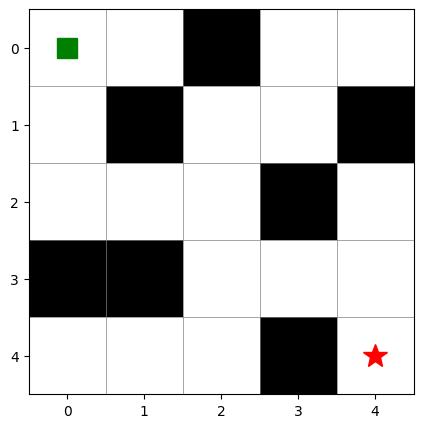

In [7]:
maze = np.array([
    [0, 0, 1, 0, 0],
    [0, 1, 0, 0, 1],
    [0, 0, 0, 1, 0],
    [1, 1, 0, 0, 0],
    [0, 0, 0, 1, 0],
])

env = MazeEnv(maze, start=(0, 0), goal=(4, 4))
plot_maze(env)

---
## Tabular REINFORCE: (no neural net)

In [20]:
from tabular_policy_maze.reinforce import train_reinforce, sample_trajectory, plot_maze_with_trajectory, plot_steps_distribution

REINFORCE Iteration:   0%|          | 0/100 [00:00<?, ?it/s]

Text(0, 0.5, 'Mean return')

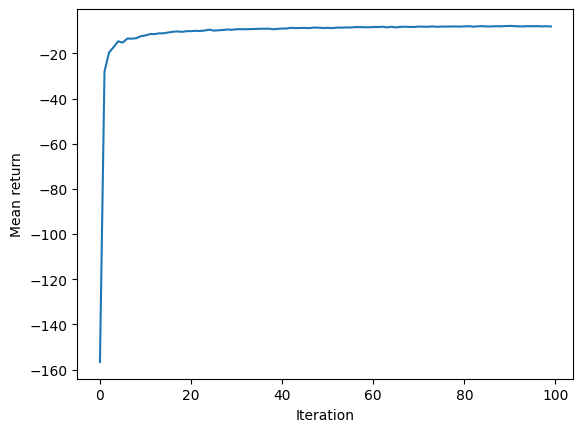

In [14]:
theta, mean_returns = train_reinforce(env, n_iter=100, n_episodes=512, alpha=0.05, gamma=1.0)

plt.plot(mean_returns)
plt.xlabel("Iteration")
plt.ylabel("Mean return")

<Axes: title={'center': 'Policy rollout  (steps: 8)'}>

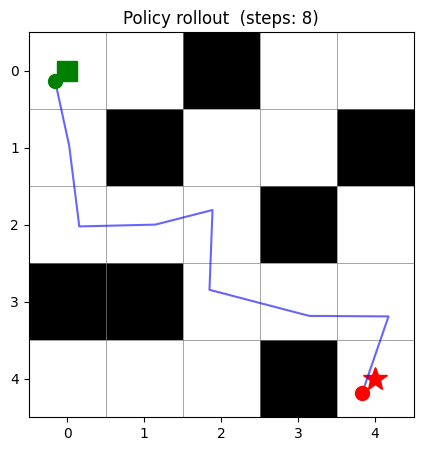

In [21]:
plot_maze_with_trajectory(env, theta, title="Policy rollout")

Sampling trajectories:   0%|          | 0/1000 [00:00<?, ?it/s]

<Axes: title={'center': 'Steps distribution (1000 episodes)'}, xlabel='Steps to goal', ylabel='Count'>

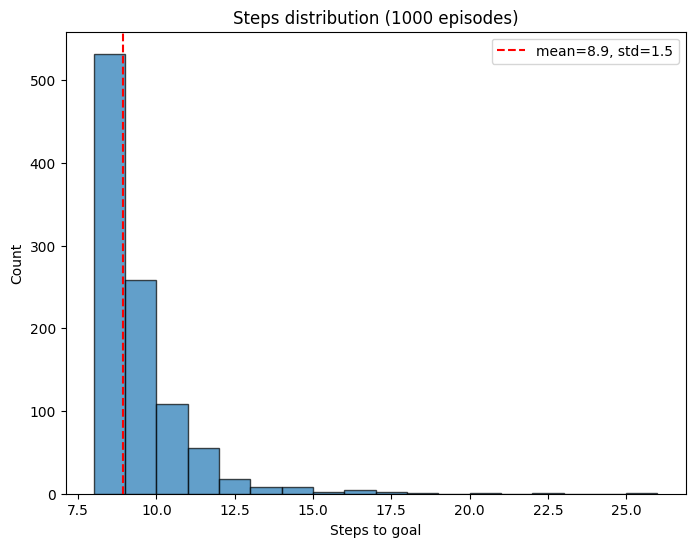

In [23]:
plot_steps_distribution(env, theta, n_trajectories=1000, figsize=(8, 6))